# Проект 1: Анализ датасета с визуализациями

## 1. Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

## 2. Загрузка и просмотр данных

In [3]:
data=pd.read_csv('cryptocurrencies_prices.csv')
data.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,USD_percent_change_1h,USD_percent_change_24h,USD_percent_change_7d,USD_percent_change_30d,USD_percent_change_60d,USD_percent_change_90d,USD_market_cap,USD_market_cap_dominance,USD_fully_diluted_market_cap,USD_last_updated
0,1,Bitcoin,BTC,bitcoin,9175,2013-04-27T18:30:00Z,NaN,21000000.0,1.896551e+07,1.896551e+07,...,0.580256,0.213243,-14.028846,7.930691,-26.385180,-33.283505,7.182518e+11,42.2047,7.953008e+11,2022-02-22T14:00:00Z
1,1027,Ethereum,ETH,ethereum,5516,2015-08-06T18:30:00Z,NaN,NaN,1.196883e+08,1.196883e+08,...,0.362044,-1.194502,-16.424475,7.368335,-36.563099,-38.249109,3.114206e+11,18.2992,3.114206e+11,2022-02-22T14:00:00Z
2,825,Tether,USDT,tether,28381,2015-02-24T18:30:00Z,NaN,NaN,7.935471e+10,8.206470e+10,...,-0.004358,0.005424,-0.005421,0.030958,0.043305,0.051258,7.939648e+10,4.6670,8.210789e+10,2022-02-22T14:00:00Z
3,1839,BNB,BNB,bnb,710,2017-07-24T18:30:00Z,NaN,165116760.0,1.651168e+08,1.651168e+08,...,0.950867,-0.130426,-14.620480,-0.008440,-32.687530,-36.709803,6.088951e+10,3.5779,6.088951e+10,2022-02-22T14:00:00Z
4,3408,USD Coin,USDC,usd-coin,3082,2018-10-07T18:30:00Z,NaN,NaN,5.272271e+10,5.272271e+10,...,0.105669,0.039643,0.085461,0.053623,0.043420,-0.092089,5.273969e+10,3.0990,5.273969e+10,2022-02-22T14:00:00Z


In [4]:
data.groupby('symbol').head(10)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,USD_percent_change_1h,USD_percent_change_24h,USD_percent_change_7d,USD_percent_change_30d,USD_percent_change_60d,USD_percent_change_90d,USD_market_cap,USD_market_cap_dominance,USD_fully_diluted_market_cap,USD_last_updated
0,1,Bitcoin,BTC,bitcoin,9175,2013-04-27T18:30:00Z,NaN,2.100000e+07,1.896551e+07,1.896551e+07,...,0.580256,0.213243,-14.028846,7.930691,-26.385180,-33.283505,7.182518e+11,42.2047,7.953008e+11,2022-02-22T14:00:00Z
1,1027,Ethereum,ETH,ethereum,5516,2015-08-06T18:30:00Z,NaN,NaN,1.196883e+08,1.196883e+08,...,0.362044,-1.194502,-16.424475,7.368335,-36.563099,-38.249109,3.114206e+11,18.2992,3.114206e+11,2022-02-22T14:00:00Z
2,825,Tether,USDT,tether,28381,2015-02-24T18:30:00Z,NaN,NaN,7.935471e+10,8.206470e+10,...,-0.004358,0.005424,-0.005421,0.030958,0.043305,0.051258,7.939648e+10,4.6670,8.210789e+10,2022-02-22T14:00:00Z
3,1839,BNB,BNB,bnb,710,2017-07-24T18:30:00Z,NaN,1.651168e+08,1.651168e+08,1.651168e+08,...,0.950867,-0.130426,-14.620480,-0.008440,-32.687530,-36.709803,6.088951e+10,3.5779,6.088951e+10,2022-02-22T14:00:00Z
4,3408,USD Coin,USDC,usd-coin,3082,2018-10-07T18:30:00Z,NaN,NaN,5.272271e+10,5.272271e+10,...,0.105669,0.039643,0.085461,0.053623,0.043420,-0.092089,5.273969e+10,3.0990,5.273969e+10,2022-02-22T14:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8416,Finxflo,FXF,finxflo,7,2021-02-08T18:30:00Z,NaN,1.500000e+08,8.379417e+07,1.500000e+08,...,0.168810,-2.399785,-16.900859,-5.834394,-36.867538,-65.765388,8.568652e+06,0.0000,1.533875e+07,2022-02-22T14:00:00Z
996,13969,Phoenix Global (new),PHB,phoenix-global-new,3,2021-11-05T08:33:00Z,NaN,NaN,3.713677e+07,3.713677e+07,...,1.380285,-1.889863,-20.239260,-18.937211,-53.767721,-64.225421,8.547035e+06,0.0000,8.547035e+06,2022-02-22T14:00:00Z
997,9958,SafeMoon Inu,SMI,safemoon-inu,9,2021-05-19T18:30:00Z,NaN,1.000000e+12,1.000000e+12,1.000000e+12,...,-0.026369,-9.745731,-40.414209,40.439556,-40.610156,-69.685962,8.535532e+06,0.0000,8.535532e+06,2022-02-22T14:00:00Z
998,4769,EOS Force,EOSC,eos-force,4,2019-10-09T18:30:00Z,NaN,NaN,9.640701e+08,1.000000e+09,...,0.369962,-4.215316,-7.531283,9.707404,-41.835106,-56.039771,8.521183e+06,0.0005,8.838759e+06,2022-02-22T14:00:00Z


## 3. Очистка и предобработка

In [5]:
# Drop columns with a high percentage of missing values
columns_to_drop = ['tags', 'self_reported_circulating_supply', 'self_reported_market_cap']
data_cleaned = data.drop(columns=columns_to_drop)

# Fill missing values in 'max_supply' with 0
data_cleaned['max_supply'] = data_cleaned['max_supply'].fillna(0)

# Convert 'date_added' and 'last_updated' to datetime
data_cleaned['date_added'] = pd.to_datetime(data_cleaned['date_added'])
data_cleaned['last_updated'] = pd.to_datetime(data_cleaned['last_updated'])

# Drop rows with missing values in critical columns
data_cleaned = data_cleaned.dropna(subset=['platform_id', 'platform_name'])

# Reset index after cleaning
data_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned dataset
data_cleaned.head()

,id,name,symbol,slug,num_market_pairs,date_added,max_supply,circulating_supply,total_supply,cmc_rank,...,USD_percent_change_1h,USD_percent_change_24h,USD_percent_change_7d,USD_percent_change_30d,USD_percent_change_60d,USD_percent_change_90d,USD_market_cap,USD_market_cap_dominance,USD_fully_diluted_market_cap,USD_last_updated
0,825,Tether,USDT,tether,28381,2015-02-24 18:30:00+00:00,0.0,7.935471e+10,8.206470e+10,3,...,-0.004358,0.005424,-0.005421,0.030958,0.043305,0.051258,7.939648e+10,4.6670,8.210789e+10,2022-02-22T14:00:00Z
1,3408,USD Coin,USDC,usd-coin,3082,2018-10-07 18:30:00+00:00,0.0,5.272271e+10,5.272271e+10,5,...,0.105669,0.039643,0.085461,0.053623,0.043420,-0.092089,5.273969e+10,3.0990,5.273969e+10,2022-02-22T14:00:00Z
2,4687,Binance USD,BUSD,binance-usd,3030,2019-09-19 18:30:00+00:00,0.0,1.829205e+10,1.829205e+10,10,...,0.000856,0.199912,0.043609,0.076652,0.122790,0.058834,1.830511e+10,1.0756,1.830511e+10,2022-02-22T14:00:00Z
3,5994,Shiba Inu,SHIB,shiba-inu,312,2020-07-31 18:30:00+00:00,0.0,5.490633e+14,5.897350e+14,14,...,0.551628,-5.267429,-20.512571,13.665868,-34.832766,-34.173192,1.341523e+10,0.7883,1.440896e+10,2022-02-22T14:00:00Z
4,4943,Dai,DAI,multi-collateral-dai,773,2019-11-21 18:30:00+00:00,0.0,1.009145e+10,1.009145e+10,17,...,-0.002559,0.086502,0.031728,0.006819,-0.158003,0.088683,1.009217e+10,0.5932,1.009217e+10,2022-02-22T14:00:00Z


## 4. Анализ данных (EDA)

In [6]:
# Summary statistics
eda_summary = data_cleaned.describe()

In [7]:
# Check for missing values
missing_values = data_cleaned.isnull().sum()

In [10]:
data_cleaned.head()

,id,name,symbol,slug,num_market_pairs,date_added,max_supply,circulating_supply,total_supply,cmc_rank,...,USD_percent_change_1h,USD_percent_change_24h,USD_percent_change_7d,USD_percent_change_30d,USD_percent_change_60d,USD_percent_change_90d,USD_market_cap,USD_market_cap_dominance,USD_fully_diluted_market_cap,USD_last_updated
0,825,Tether,USDT,tether,28381,2015-02-24 18:30:00+00:00,0.0,7.935471e+10,8.206470e+10,3,...,-0.004358,0.005424,-0.005421,0.030958,0.043305,0.051258,7.939648e+10,4.6670,8.210789e+10,2022-02-22T14:00:00Z
1,3408,USD Coin,USDC,usd-coin,3082,2018-10-07 18:30:00+00:00,0.0,5.272271e+10,5.272271e+10,5,...,0.105669,0.039643,0.085461,0.053623,0.043420,-0.092089,5.273969e+10,3.0990,5.273969e+10,2022-02-22T14:00:00Z
2,4687,Binance USD,BUSD,binance-usd,3030,2019-09-19 18:30:00+00:00,0.0,1.829205e+10,1.829205e+10,10,...,0.000856,0.199912,0.043609,0.076652,0.122790,0.058834,1.830511e+10,1.0756,1.830511e+10,2022-02-22T14:00:00Z
3,5994,Shiba Inu,SHIB,shiba-inu,312,2020-07-31 18:30:00+00:00,0.0,5.490633e+14,5.897350e+14,14,...,0.551628,-5.267429,-20.512571,13.665868,-34.832766,-34.173192,1.341523e+10,0.7883,1.440896e+10,2022-02-22T14:00:00Z
4,4943,Dai,DAI,multi-collateral-dai,773,2019-11-21 18:30:00+00:00,0.0,1.009145e+10,1.009145e+10,17,...,-0.002559,0.086502,0.031728,0.006819,-0.158003,0.088683,1.009217e+10,0.5932,1.009217e+10,2022-02-22T14:00:00Z


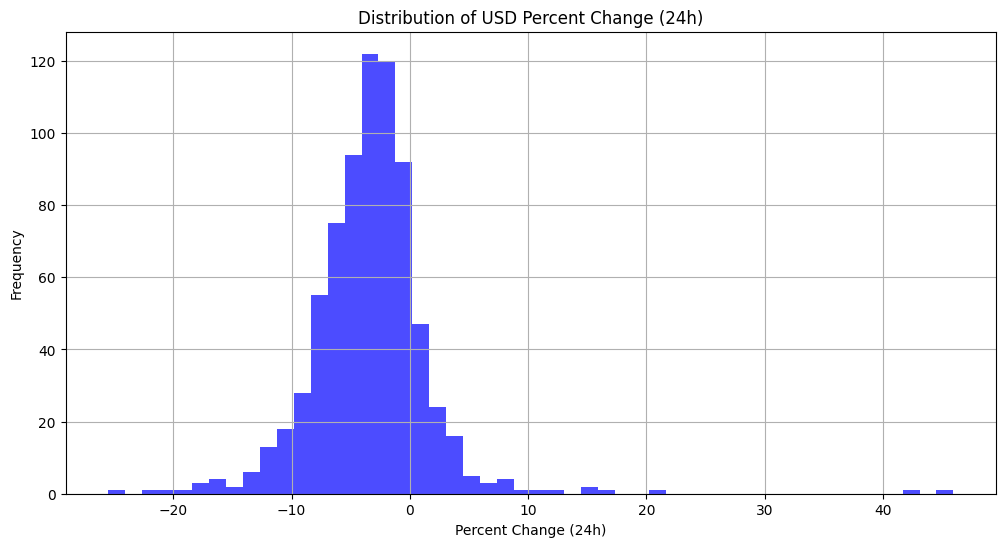

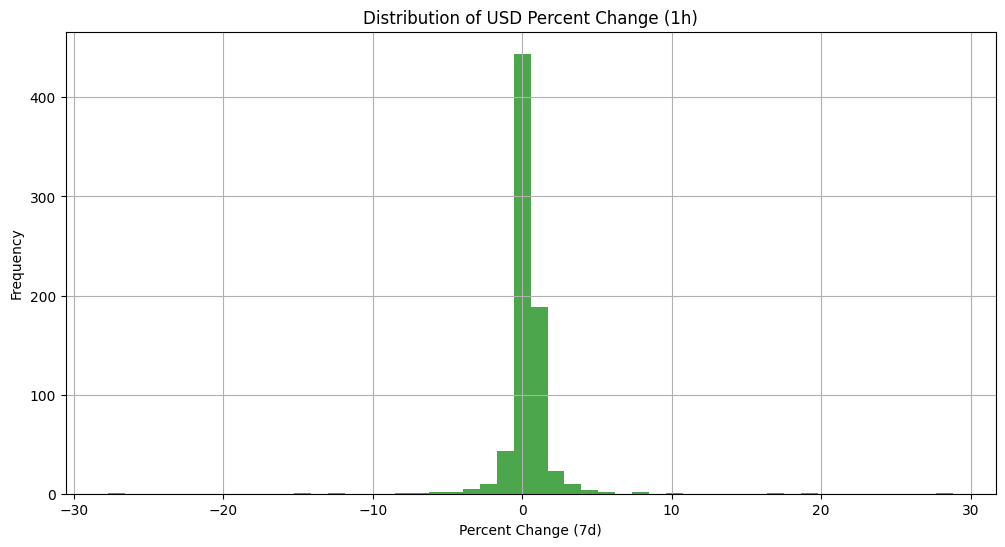

In [21]:
# Plot USD_percent_change_24h
plt.figure(figsize=(12, 6))
plt.hist(data_cleaned['USD_percent_change_24h'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of USD Percent Change (24h)')
plt.xlabel('Percent Change (24h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot USD_percent_change_7d
plt.figure(figsize=(12, 6))
plt.hist(data_cleaned['USD_percent_change_1h'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of USD Percent Change (1h)')
plt.xlabel('Percent Change (7d)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
# Display summary and missing values
print("Summary Statistics:\n", eda_summary)
print("\nMissing Values:\n", missing_values)

Summary Statistics:
                  id  num_market_pairs    max_supply  circulating_supply  \
count    744.000000        744.000000  7.440000e+02        7.440000e+02   
mean    6784.885753         88.684140  1.501681e+15        1.457401e+15   
std     3446.444059       1069.917156  3.684074e+16        3.607711e+16   
min      576.000000          1.000000  0.000000e+00        3.020000e+02   
25%     3910.250000          8.000000  0.000000e+00        3.083048e+07   
50%     6935.000000         18.000000  1.000000e+08        1.543629e+08   
75%     8839.000000         39.000000  1.000000e+09        9.976714e+08   
max    18112.000000      28381.000000  1.000000e+18        9.818477e+17   

       total_supply     cmc_rank  platform_id     USD_price  USD_volume_24h  \
count  7.440000e+02   744.000000   744.000000  7.440000e+02    7.440000e+02   
mean   1.537696e+15   526.821237  1364.052419  4.603848e+02    1.303072e+08   
std    3.621196e+16   276.679414   900.862994  4.378356e+03    2.4

## 5. Визуализации (гистограммы, боксплоты, графики)

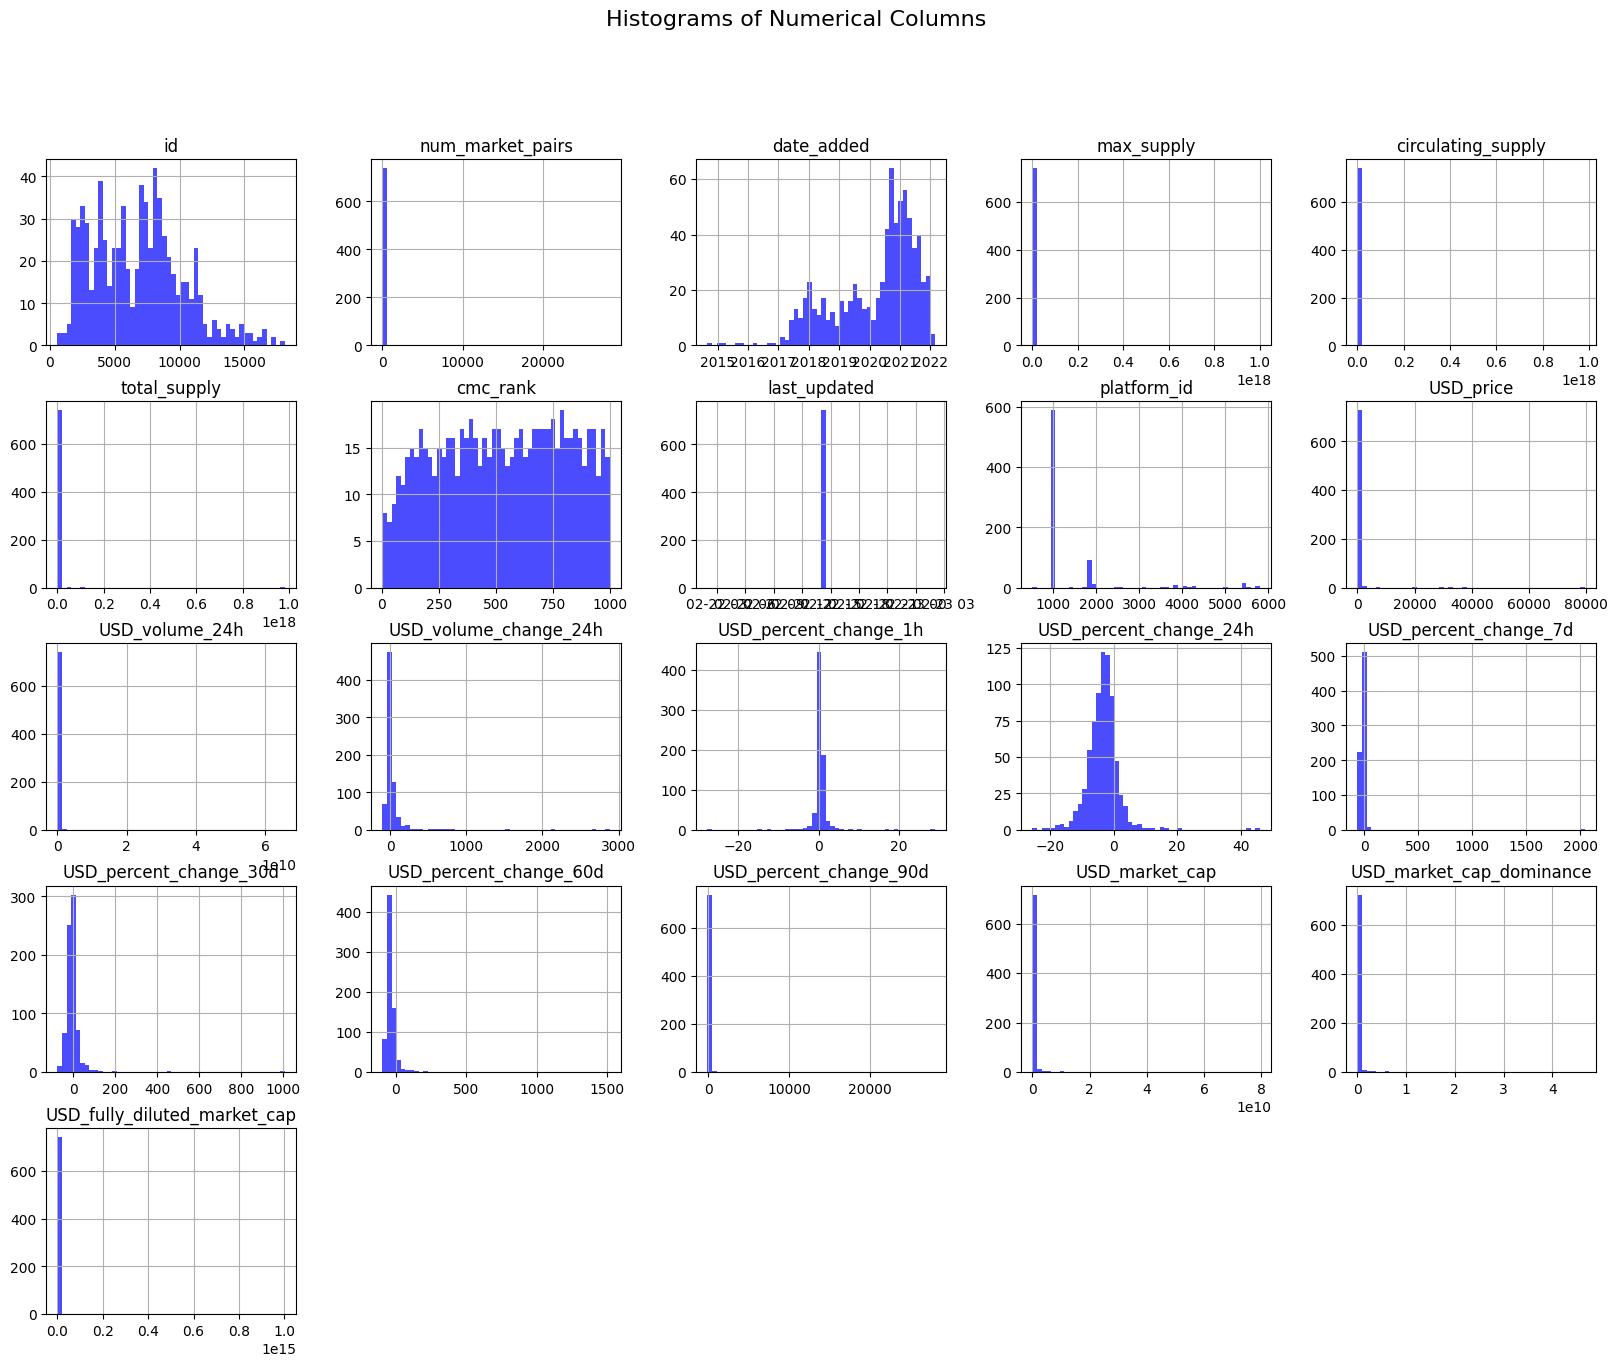

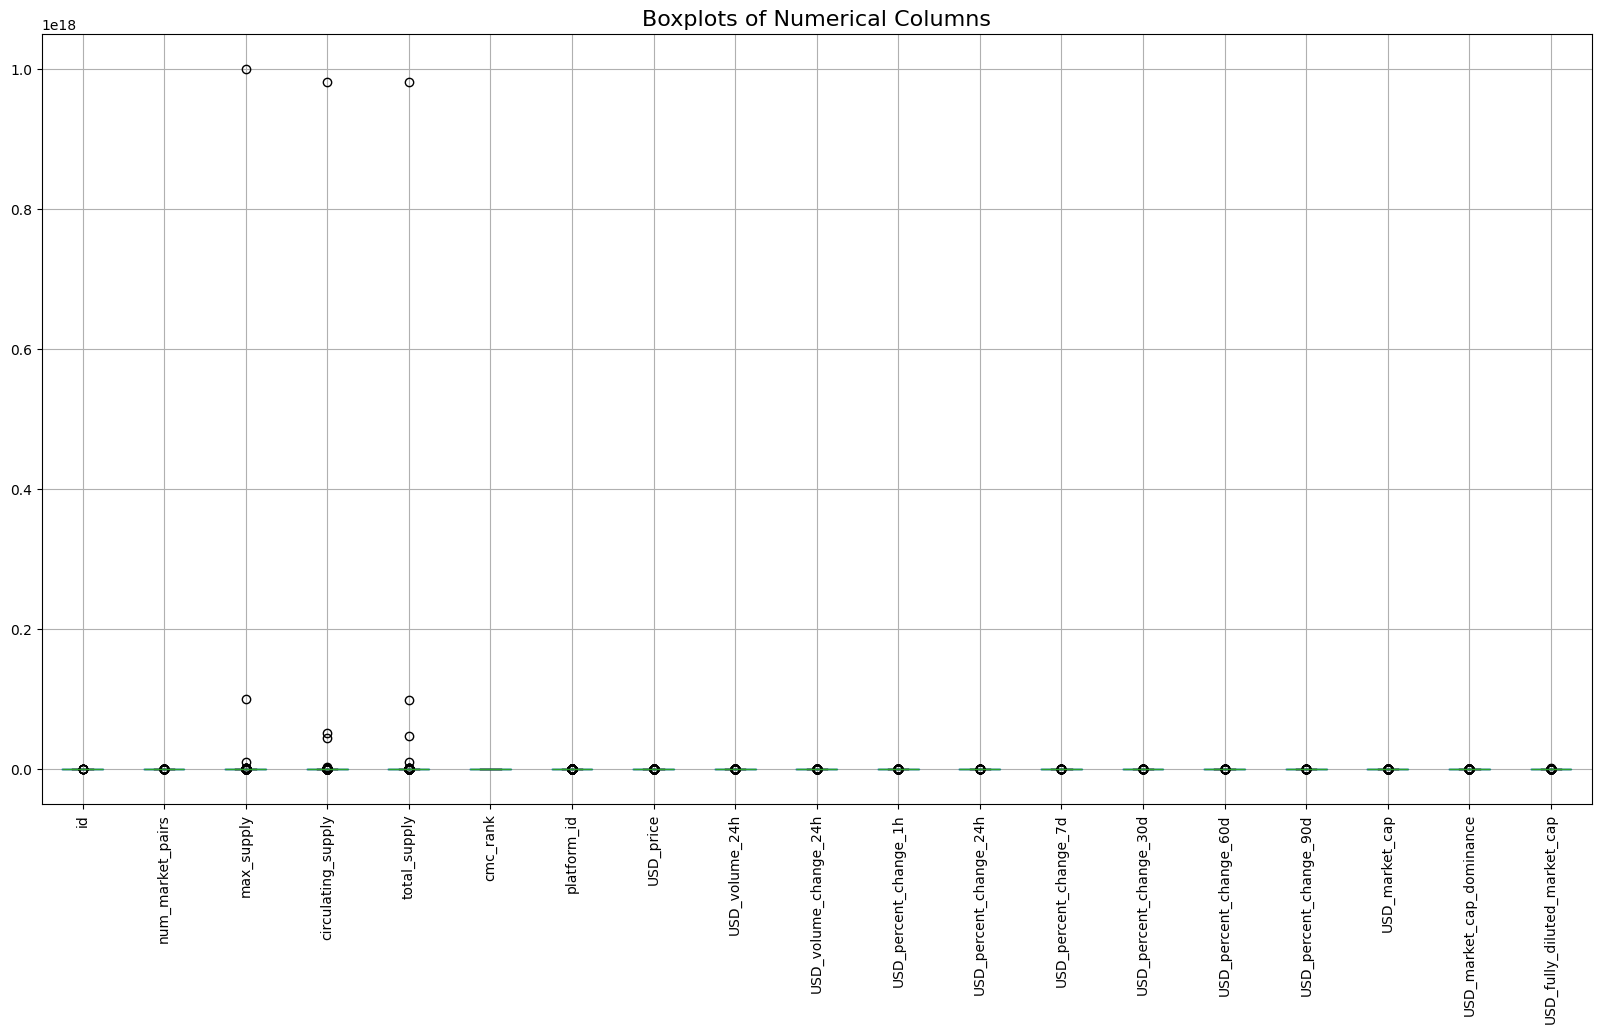

In [25]:
# Generate histograms for numerical columns
data_cleaned.hist(figsize=(20, 15), bins=50, color='blue', alpha=0.7)
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()

# Generate boxplots for numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 10))
data_cleaned[numerical_columns].boxplot()
plt.title('Boxplots of Numerical Columns', fontsize=16)
plt.xticks(rotation=90)
plt.show()

## 6. Выводы и инсайты

1. **Доминирующее положение Bitcoin и Ethereum**  
   Bitcoin (BTC) и Ethereum (ETH) остаются лидерами по рыночной капитализации и доминированию на рынке. Их высокая ликвидность подтверждается количеством торговых пар и уровнем капитализации.

2. **Стабильность стейблкоинов**  
   Криптовалюты, привязанные к фиатным валютам (например, USDT и USDC), демонстрируют минимальные колебания цен, что делает их надёжным инструментом для хеджирования и хранения средств в условиях волатильности рынка.

3. **Общерыночная коррекция**  
   Большинство ведущих криптовалют показали отрицательную динамику за последние 60 и 90 дней, что может свидетельствовать о фазе коррекции после предыдущего роста. Однако в 30-дневной перспективе наблюдаются признаки восстановления.

4. **Разнообразие рыночных предложений**  
   В выборке представлено множество криптовалют с различными характеристиками: от крупных проектов до малоизвестных токенов с низкой капитализацией. Это подчеркивает разнообразие и неоднородность крипторынка.

5. **Необходимость дальнейшей очистки данных**  
   Некоторые признаки содержат пропущенные значения (например, максимальная эмиссия). При дальнейшем анализе рекомендуется учитывать это и применять соответствующие методы обработки пропусков.
